# State Task Network (Kondili and Sargent, 1993)

A state-task network is a graphical representation of the activities in a multiproduct batch process. The representation includes the details needed for the short term scheduling of batch operations. A typical and well-studied example due to Kondili (1993) is shown below.

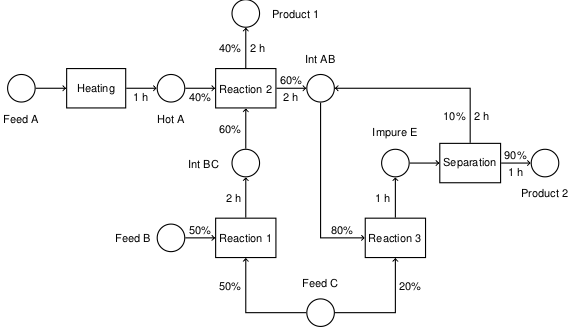

Each circular node in the diagram designates material in a particular state.  The materials are generally held in suitable vessels with a known capacity. The relevant information for each state is the initial inventory, storage capacity, and the unit price of the material in each state. The price of materials in intermediate states may be assigned penalities in order to minimize the amount of work in progress.

The rectangular nodes denote process tasks. When scheduled for execution, each task is assigned an appropriate piece of equipment, and assigned a batch of material according to the incoming arcs. Each incoming arc begins at a state where the associated label indicates the mass fraction of the batch coming from that particular state. Outgoing arcs indicate the disposition of the batch to product states. The outgoing are labels indicate the fraction of the batch assigned to each product state, and the time necessary to produce that product. 

Not shown in the diagram is the process equipment used to execute the tasks. A separate list of process units is available, each characterized by a capacity and list of tasks which can be performed in that unit.

In [3]:
%matplotlib inline

import sys
sys.path.append('../STN')
from STN import STN

# create instance
stn = STN()

# states
stn.state("FeedA", init = 200)
stn.state("FeedB", init = 200)
stn.state("FeedC", init = 200)
stn.state("IntBC")
stn.state("Product_1", price = 10)
stn.state("Product_2", price = 10)

# state to task arcs
stn.STarc("FeedA", "Heating")
stn.STarc("FeedB", "Reaction_1", rho = 0.5)
stn.STarc("FeedC", "Reaction_1", rho = 0.5)
stn.STarc("FeedC", "Reaction_3", rho = 0.2)
stn.STarc("HotA", "Reaction_2", rho = 0.4)
stn.STarc("IntAB", "Reaction_3", rho = 0.8)
stn.STarc("IntBC", "Reaction_2", rho = 0.6)
stn.STarc("ImpureE", "Separation")

# task to state arcs
stn.TSarc("Heating", "HotA", 1, 1)
stn.TSarc("Reaction_2", "IntAB", rho=0.6, dur=2)
stn.TSarc("Reaction_2", "Product_1", rho=0.4, dur=2)
stn.TSarc("Reaction_1", "IntBC", dur=2)
stn.TSarc("Reaction_3", "ImpureE", dur=1)
stn.TSarc("Separation", "IntAB", rho=0.1, dur=2)
stn.TSarc("Separation", "Product_2", rho=0.9, dur=1)

# unit-task data
stn.Unit("Heater", "Heating", 0, 100)
stn.Unit("Reactor_1", "Reaction_1", 0, 80)
stn.Unit("Reactor_1", "Reaction_2", 0, 80)
stn.Unit("Reactor_1", "Reaction_3", 0, 80)
stn.Unit("Reactor_2", "Reaction_1", 0, 50)
stn.Unit("Reactor_2", "Reaction_2", 0, 50)
stn.Unit("Reactor_2", "Reaction_3", 0, 50)
stn.Unit("Still", "Separation", 0, 200)

stn.buildmodel()
stn.solve()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 2833.75
  Upper bound: 2833.75
  Number of objectives: 1
  Number of constraints: 409
  Number of variables: 321
  Number of nonzeros: 1153
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 431
      Number of created subproblems: 431
  Error rc: 0
  Time: 0.2058858871459961
# ----------------------------------------------------------
#   Solution Information
# -----------------------

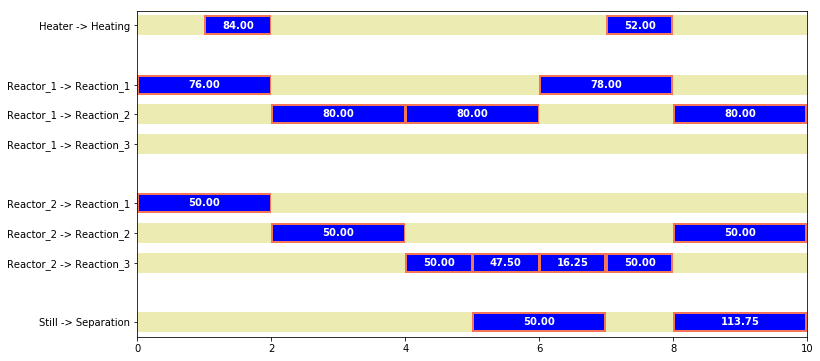

In [4]:
stn.gantt()